<a href="https://colab.research.google.com/github/ViniMBlanco/PredicaoDepositodeBanco/blob/main/PredicaoDepositodeBanco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import files
uploaded = files.upload()



Saving bank-full.csv to bank-full (1).csv


## **EDA**(Análise exploratória de dados)

In [24]:
import pandas as pd

df = pd.read_csv('bank-full.csv',sep=';')

df.head()





,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



 Contagem da variável alvo (y):
y
no     39922
yes     5289
Name: count, dtype: int64

 Proporção (%):
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


/tmp/ipython-input-2343874163.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["y"].value_counts().index,


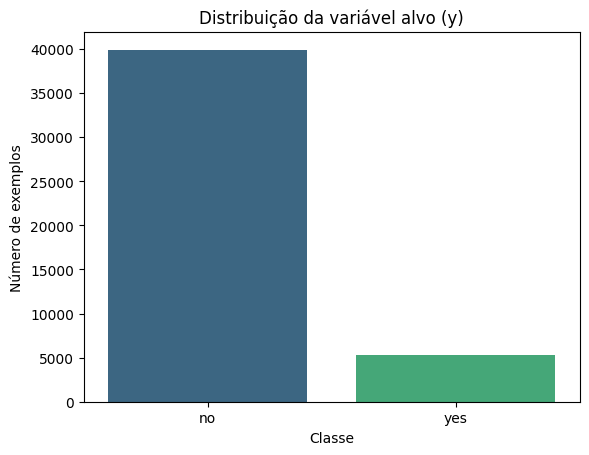

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Verificando balanceamento da variável alvo
print("\n Contagem da variável alvo (y):")
print(df["y"].value_counts())

print("\n Proporção (%):")
print(df["y"].value_counts(normalize=True) * 100)

# Plotando gráfico de barras
sns.barplot(x=df["y"].value_counts().index,
            y=df["y"].value_counts().values,
            palette="viridis")

plt.title("Distribuição da variável alvo (y)")
plt.ylabel("Número de exemplos")
plt.xlabel("Classe")
plt.show()

1. Variáveis Numéricas x target


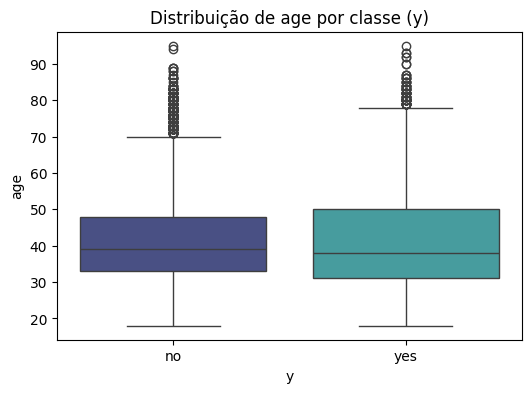

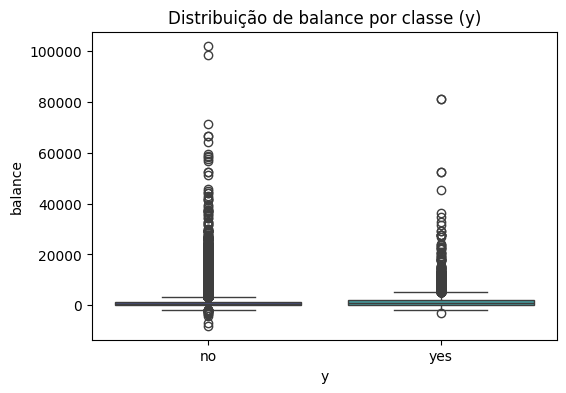

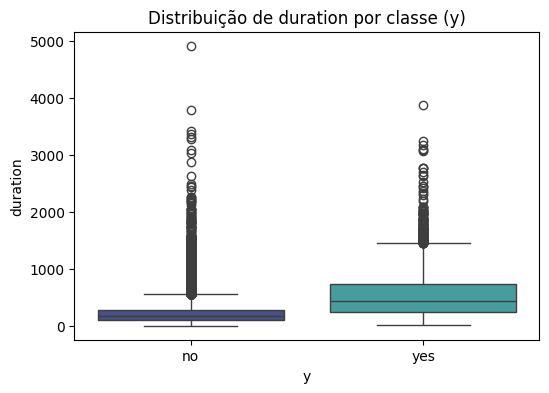

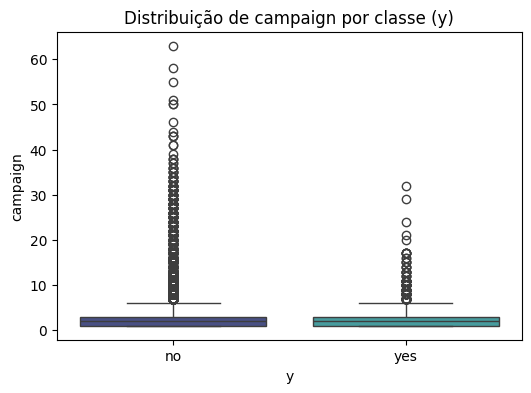

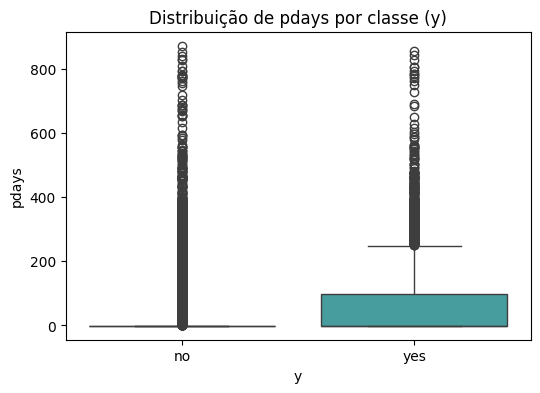

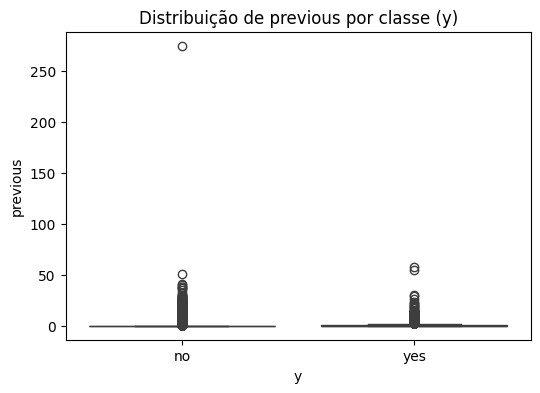

------------------------------------------
2. Variáveis categóricas × target


<Figure size 800x400 with 0 Axes>

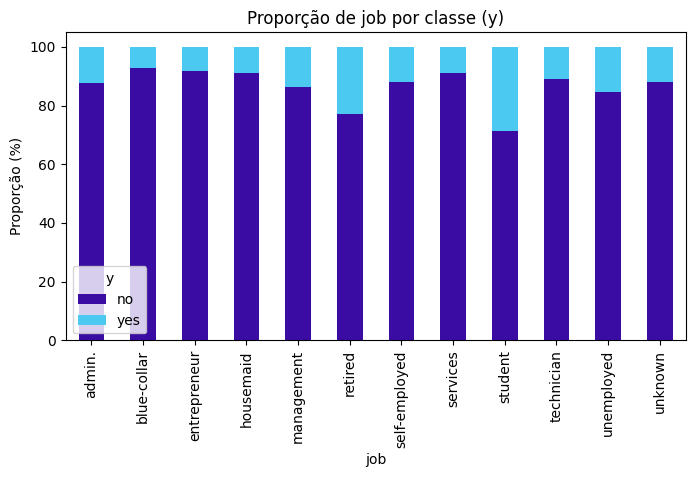

<Figure size 800x400 with 0 Axes>

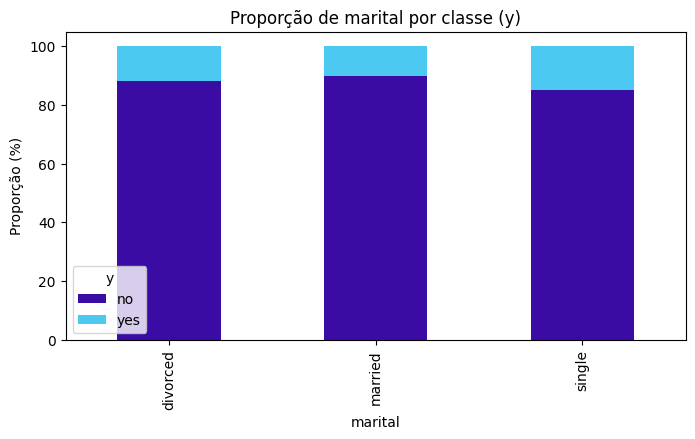

<Figure size 800x400 with 0 Axes>

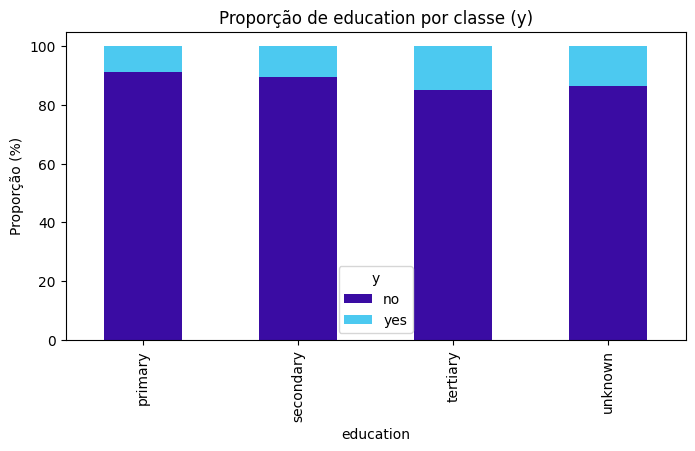

<Figure size 800x400 with 0 Axes>

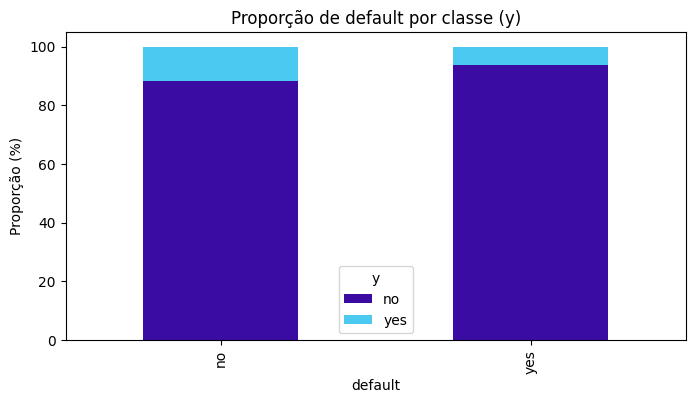

<Figure size 800x400 with 0 Axes>

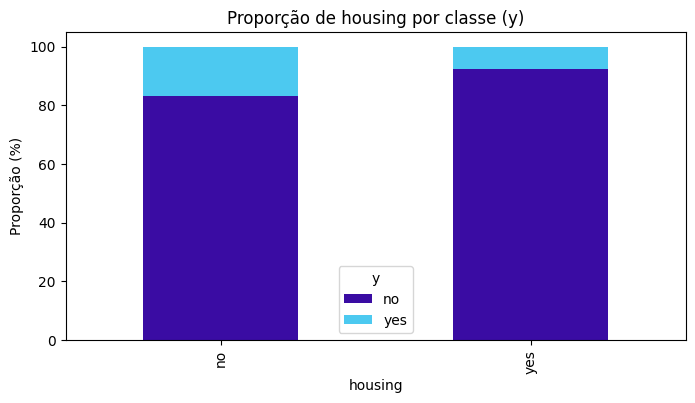

<Figure size 800x400 with 0 Axes>

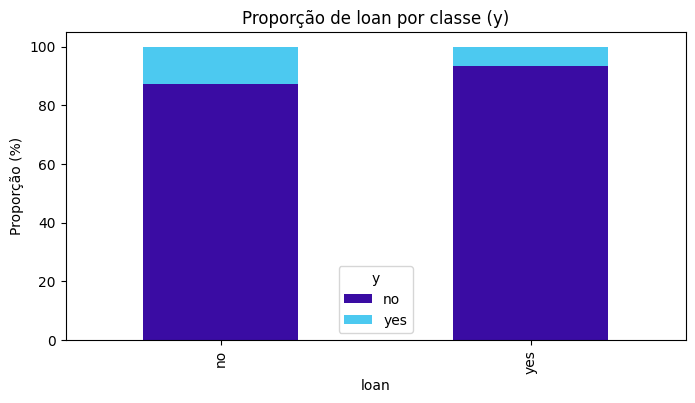

<Figure size 800x400 with 0 Axes>

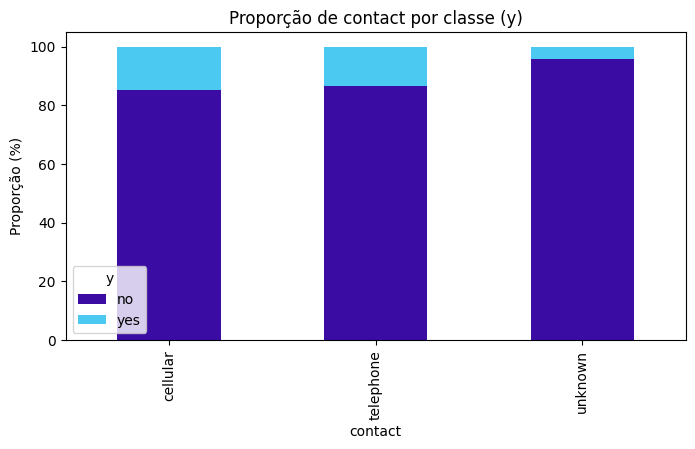

<Figure size 800x400 with 0 Axes>

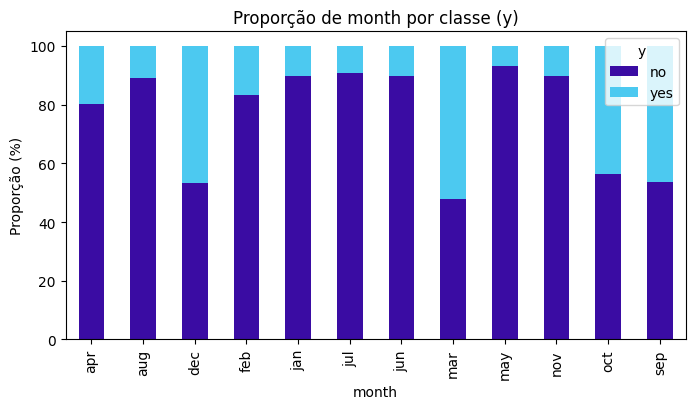

<Figure size 800x400 with 0 Axes>

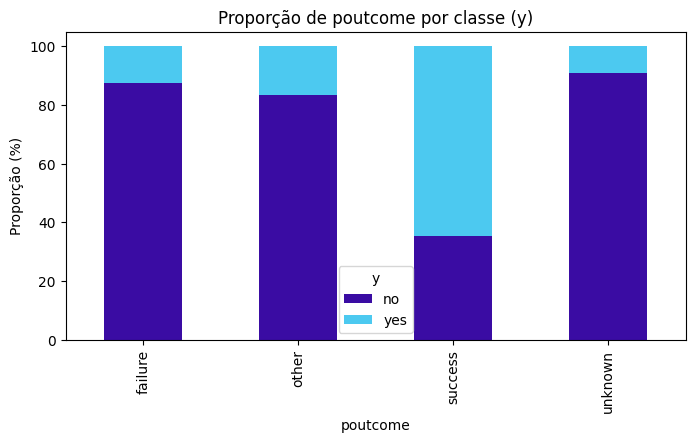

In [26]:
print("1. Variáveis Numéricas x target")
num_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="y", y=col, data=df,hue = "y", palette="mako", legend=False)
    plt.title(f"Distribuição de {col} por classe (y)")
    plt.show()

print ("------------------------------------------")

print("2. Variáveis categóricas × target")


cat_cols = ["job", "marital", "education", "default",
            "housing", "loan", "contact", "month", "poutcome"]

for col in cat_cols:
    plt.figure(figsize=(8,4))
    prop = pd.crosstab(df[col], df["y"], normalize="index") * 100
    prop.plot(kind="bar", stacked=True, color=["#3A0CA3","#4CC9F0" ], figsize=(8,4))
    plt.title(f"Proporção de {col} por classe (y)")
    plt.ylabel("Proporção (%)")
    plt.xlabel(col)
    plt.legend(title="y")
    plt.show()

Conclusão prévia: Conforme os gráficos feitos com os dados do DataSet, é possível analisar algumas correlações entre esses dados, por exemplo da variáveis numéricas, algumas que demonstram uma relação seria a variável duration e pdays. Já as categóricas é possível notar essas correlações principalmente nas variáveis "poutcome", o qual se teve sucesso mais possível de aceitar o depósito e "month", com destaque para mês de dezembro, março, outubro e setembro. Algumas outras variáveis apresentam fracas correlações como "age"(mais velho, maior a relação), "job", "default","housing" e "loan".

Contudo, a principal informação retirada dessa análise prévia seria que esse DataSet utilizado é extremamente desbalanceado, com a maioria dos casos sendo "No", o qual afetará diretamente no treinamento dos modelos.


 ## Treino com Dataset


### Regressão Logística


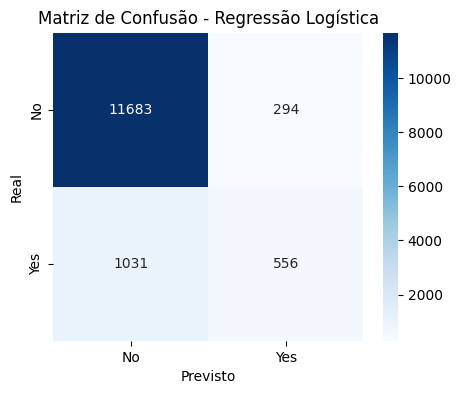

Acurácia: 0.9023
Precisão: 0.6541
Recall (Sensibilidade): 0.3503

Relatório de Classificação:
              precision    recall  f1-score   support

          No       0.92      0.98      0.95     11977
         Yes       0.65      0.35      0.46      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar e preparar os dados novamente
df = pd.read_csv("bank-full.csv", sep=";")

# Separando X e y para treinamento
X = df.drop("y", axis=1)
y = df["y"]

# Codificar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Transformar target em binário (yes=1, no=0)
y = y.map({"yes":1, "no":0})

# Normalizar variáveis numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/teste com estratificação por ser dataset desbalanceado
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


# 2. Treino do modelo Regressão Logística

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Previsões
y_pred = log_reg.predict(X_test)


# 3. Avaliação do modelo
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Métricas de avaliação
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("Acurácia:", round(acc,4))
print("Precisão:", round(prec,4))
print("Recall (Sensibilidade):", round(rec,4))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=["No","Yes"]))


**Análise do Relatório - Regressão Logística**

O Modelo demonstrou alta acurácia (0.9023), mas pode ser um valor que engana, pois a DataSet é desbalanceado, sendo a maioria dos casos "No", logo já daria um acerto de "No" maior.
Ao analisar o recall, que foi baixo(0.35), e a precisão moderada(0.65), é possível assumir que o modelo ignora grande parte dos clientes que vão assinar o depósito pelo recall e que quando prevê "Yes" acerta apenas 65%, o que não é um valor muito bom.

Logo, como conclusão, nota-se que em um caso real. o banco perderia uma boa parte dos clientes potenciais por errar essa predição.

**Resultado do modelo para o DataSet:** Regressão Logística é um modelo linear e simples, que tende a favorecer a classe majoritária em datasets desbalanceados.

### RandomForest

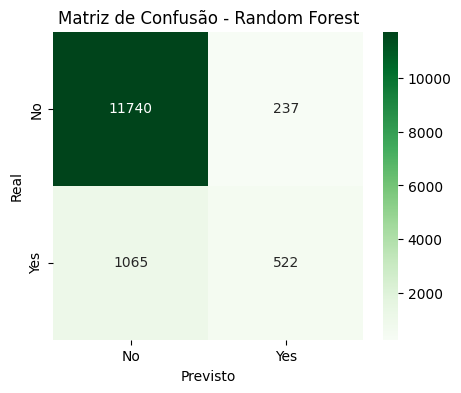

Acurácia (Random Forest): 0.904
Precisão (Random Forest): 0.6877
Recall (Sensibilidade - Random Forest): 0.3289

Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

          No       0.92      0.98      0.95     11977
         Yes       0.69      0.33      0.45      1587

    accuracy                           0.90     13564
   macro avg       0.80      0.65      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [28]:
from sklearn.ensemble import RandomForestClassifier

#Sem a parte de carregar e preparar os dados, já feito anteriormente

# 1. Treino do modelo Random Forest
rf = RandomForestClassifier(
    n_estimators=200,       # número de árvores
    max_depth=None,         # deixa crescer até onde for melhor
    random_state=42,
    class_weight="balanced" # ajuda em datasets desbalanceados
)
rf.fit(X_train, y_train)

# Previsões
y_pred_rf = rf.predict(X_test)


# 2. Avaliação do modelo
# Matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Métricas de Avaliação
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)

print("Acurácia (Random Forest):", round(acc_rf,4))
print("Precisão (Random Forest):", round(prec_rf,4))
print("Recall (Sensibilidade - Random Forest):", round(rec_rf,4))
print("\nRelatório de Classificação (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=["No","Yes"]))


**Análise do Relatório - RandomForest**

Resultados bem parecidos com a Regressão Logística, com um pouco de melhora na precisão, subindo 0.04.Mas ainda não melhorou o recall, que continua baixo. Na prática, ele ainda não é capaz de identificar bem os clientes que aderem.

### Conclusão após o treino dos modelos

No DataSet utilizado (UCI Bank Marketing Dataset) mostra-se a maioria dos clientes recusa o depósito, tranformando em um DataSet desbalanceado.
Os resultados da avaliação dos modelos mostrou o que era esperado, que seria uma alta acurácia e baixo recall, por conta desse desbalanceamento (maioria dos casos sendo "No").
Para melhorar os modelos é necessário utilizar algumas técnicas de balanceamento como Oversampling da classe minoritária (ex.: SMOTE) e
Undersampling da classe majoritária.

## Treinamento do Modelo RandomForest Utilizando Oversampling(Smote)

**Breve Funcionamento de Smote:** Geram novos exemplos para a classe minoritária ao invés de só duplicar; isso ajuda a evitar overfitting comparado ao random oversampling simples.

Antes do SMOTE: Counter({0: 27945, 1: 3702})
Depois do SMOTE: Counter({0: 27945, 1: 27945})


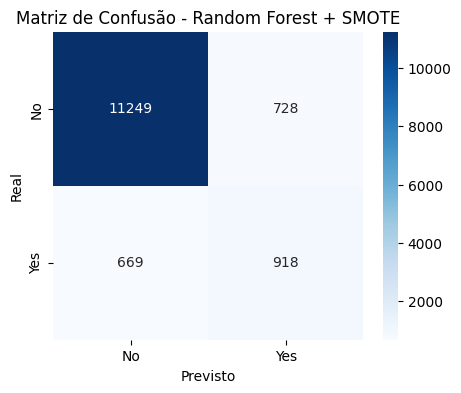

Acurácia: 0.897
Precisão: 0.5577
Recall (Sensibilidade): 0.5784

Relatório de classificação:
              precision    recall  f1-score   support

          No       0.94      0.94      0.94     11977
         Yes       0.56      0.58      0.57      1587

    accuracy                           0.90     13564
   macro avg       0.75      0.76      0.75     13564
weighted avg       0.90      0.90      0.90     13564



In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Carregar e preparar os dados novamente
df = pd.read_csv("bank-full.csv", sep=";")

# Separar features e target
X = df.drop("y", axis=1)
y = df["y"].map({"yes":1, "no":0})

# Codificar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Normalizar numericas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/teste estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Ver balanceamento antes
from collections import Counter
print("Antes do SMOTE:", Counter(y_train))


# 2. Aplicar SMOTE no conjunto de treino

sm = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Depois do SMOTE:", Counter(y_train_sm))


# 3. Treinar modelo RandomForest com dados balanceados
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_sm, y_train_sm)

# Predição
y_pred_sm = model.predict(X_test)


# 4. Avaliação do modelo
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_sm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No","Yes"],
            yticklabels=["No","Yes"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest + SMOTE")
plt.show()

# Métricas de Avaliação
acc = accuracy_score(y_test, y_pred_sm)
prec = precision_score(y_test, y_pred_sm)
rec = recall_score(y_test, y_pred_sm)

print("Acurácia:", round(acc,4))
print("Precisão:", round(prec,4))
print("Recall (Sensibilidade):", round(rec,4))
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred_sm, target_names=["No","Yes"]))


## Treinamento do Modelo Regressão Logística Utilizando Oversampling(Smote)

Antes do SMOTE: y
0    27945
1     3702
Name: count, dtype: int64
Depois do SMOTE: y
0    27945
1    27945
Name: count, dtype: int64


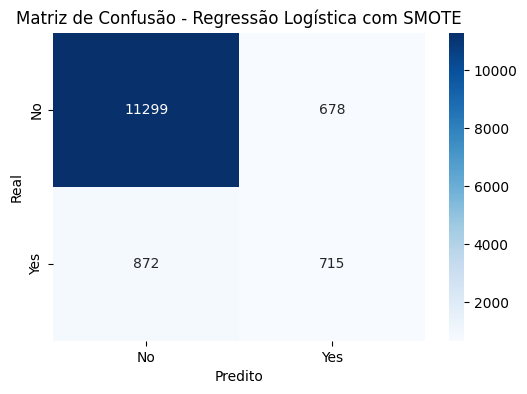

Acurácia: 0.897
Precisão: 0.5577
Recall (Sensibilidade): 0.5784

Relatório de classificação:
              precision    recall  f1-score   support

          No       0.93      0.94      0.94     11977
         Yes       0.51      0.45      0.48      1587

    accuracy                           0.89     13564
   macro avg       0.72      0.70      0.71     13564
weighted avg       0.88      0.89      0.88     13564



In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

# Separar features e target
X = df.drop("y", axis=1)
y = df["y"].map({"yes":1, "no":0})  # converter para 0 e 1

# One-hot encoding para variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Aplicar SMOTE no treino
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Antes do SMOTE:", y_train.value_counts())
print("Depois do SMOTE:", y_train_res.value_counts())

# Padronização
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Modelo de Regressão Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)

# Predições
y_pred = log_reg.predict(X_test)

# Avaliação do Modelo

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística com SMOTE")
plt.show()


# Métricas de Avaliação
print("Acurácia:", round(acc,4))
print("Precisão:", round(prec,4))
print("Recall (Sensibilidade):", round(rec,4))
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred, target_names=["No","Yes"]))


## Conclusão

**Conclusão Final**
A partir do treinamento do Modelo utilizando SMOTE, é possível notar a diferença do dataset, tornando em um DataSet totalmente equilibrado para treino (50% "No" e 50% "Yes"), com isso para melhor eficácia dos resultados.
Pela avaliação resultante de ambos os casos, é possível notar uma grande melhora do recall, evitando aparecer os falsos negativos(0.33 -> 0.58 "RandomForest" e 0.35->0.45 "Regressão Logística") e, e uma piora na precisão(0.69 -> 0.56 "Random Forest" e 0.65 ->0.51), indicando maior aparência de falsos positivos, o que totalmente esperado.
Em suma, utilizar o SMOTE passou a identificar muito melhor a classe minoritária (“Yes”), evitando que a classe minoritária passe dispercepida. Em cenários reais, essa troca costuma ser benéfica, pois é mais vantajoso ofertar para alguns clientes que não aceitarão, do que perder potenciais interessados.

**Qual foi melhor nesse caso e porque?**

O modelo de RandomForest apresentou melhores respostas, com um recall significativamente maior (0.58 e 0.45, depois do SMOTE), e a precisão bem similar.

Analisando o caso do DataSet em específico, considera-se que em um caso real, o objetivo seja maximizar clientes capturados (Yes), logo o Random Forest é a escolha mais segura. A Regressão Logística ainda apresenta bom desempenho global, mas subestima fortemente a classe minoritária, o que é crítico em campanhas de marketing, pois cada Yes perdido representa uma oportunidade não aproveitada.

Essa diferença no caso, a Random Forest apresentou melhor desempenho porque lida melhor com grandes volumes de dados, alta dimensionalidade e relações não lineares entre as variáveis, demonstrando grandes variáveis categóricas além de serem desbalanceadas. Além disso, é mais robusta a ruídos e outliers, construindo várias árvores que, ao serem combinadas, reduzem erros e aumentam a capacidade de identificar corretamente a classe minoritária, o que não ocorre com a Regressão Logística, limitada a relações essencialmente lineares com variáveis mais contínuas.